In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0




1. **id**: A unique identifier for each row in the dataset (usually doesn't hold any useful information for modeling purposes).

2. **age**: The age of the patient (in years).

3. **sex**: The sex of the patient. Typically, 1 represents male and 0 represents female.

4. **dataset**: This column might indicate the source or specific group of the dataset (but it's not common in many implementations of the dataset).

5. **cp**: Chest pain type. This column contains values that represent the type of chest pain experienced by the patient. It’s usually represented as:
   - 1: typical angina
   - 2: atypical angina
   - 3: non-anginal pain
   - 4: asymptomatic
   Sure! Here's a simpler explanation:

1. **Typical angina (1)**: Chest pain that happens when you're doing physical activities or feeling stressed. It usually goes away when you rest. This kind of pain is often caused by heart problems.

2. **Atypical angina (2)**: Chest pain that doesn't follow the usual pattern. It might happen in different situations or feel different from the usual chest pain caused by heart problems.

3. **Non-anginal pain (3)**: Chest pain that isn’t related to heart problems. It could be caused by things like muscle strain or indigestion.

4. **Asymptomatic (4)**: No chest pain at all. The person feels fine, but they might still have heart problems without any noticeable symptoms.

This helps doctors understand the kind of chest pain a person has, which can indicate if there are heart issues.

6. **trestbps**: Resting blood pressure (in mm Hg) when the patient is at rest.

7. **chol**: Serum cholesterol level (in mg/dl) obtained from a blood test.

8. **fbs**: Fasting blood sugar. It is typically represented as:
   - 1: fasting blood sugar > 120 mg/dl (true)
   - 0: fasting blood sugar ≤ 120 mg/dl (false)

9. **restecg**: Resting electrocardiographic results. This column shows the results from an electrocardiogram (ECG) test and typically has values like:
   - 0: normal
   - 1: having ST-T wave abnormality
   - 2: showing probable or definite left ventricular hypertrophy

10. **thalch**: Maximum heart rate achieved during the exercise stress test (beats per minute).

11. **exang**: Exercise induced angina. This column indicates whether the patient experienced angina during exercise:
    - 1: yes
    - 0: no

12. **oldpeak**: ST depression induced by exercise relative to rest (measured in units). It shows how much the ECG signal drops during exercise compared to rest.

13. **slope**: The slope of the peak exercise ST segment. This represents the type of exercise-induced heart stress the patient experienced:
    - 1: upsloping
    - 2: flat
    - 3: downsloping

14. **ca**: Number of major vessels colored by fluoroscopy (0-3). This indicates how many coronary arteries have significant narrowing.

15. **thal**: Thalassemia (a type of blood disorder). Values typically include:
    - 3: normal
    - 6: fixed defect
    - 7: reversible defect

16. **num**: This is the target column, representing the presence or absence of heart disease. Typically:
    - 0: no heart disease
    - 1-4: presence and severity of heart disease (different levels of diagnosis).

This dataset is often used for classification tasks, where the goal is to predict **num** (whether or not the patient has heart disease) based on the other features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [10]:
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


<ipython-input-10-368fe68ea7da>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
<ipython-input-10-368fe68ea7da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   920 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [13]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,NaN,0.5,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,NaN,0.5,NaN,NaN,NaN,0


In [14]:
mode_data=df['dataset'].mode()[0]
df['dataset'].fillna(mode_data,inplace=True)

<ipython-input-14-998c219dc6a4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dataset'].fillna(mode_data,inplace=True)


In [15]:
mode_data2=df['slope'].mode()[0]
df['slope'].fillna(mode_data2,inplace=True)

<ipython-input-15-b72772110e4c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['slope'].fillna(mode_data2,inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [19]:
df['restecg'].fillna(df['restecg'].mode()[0],inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0],inplace=True)
df['exang'].fillna(df['exang'].mode()[0],inplace=True)



<ipython-input-19-423f5be94089>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['restecg'].fillna(df['restecg'].mode()[0],inplace=True)
<ipython-input-19-423f5be94089>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(6)
memory usage: 95.4+ KB


# **Multi-Variate Analysis**

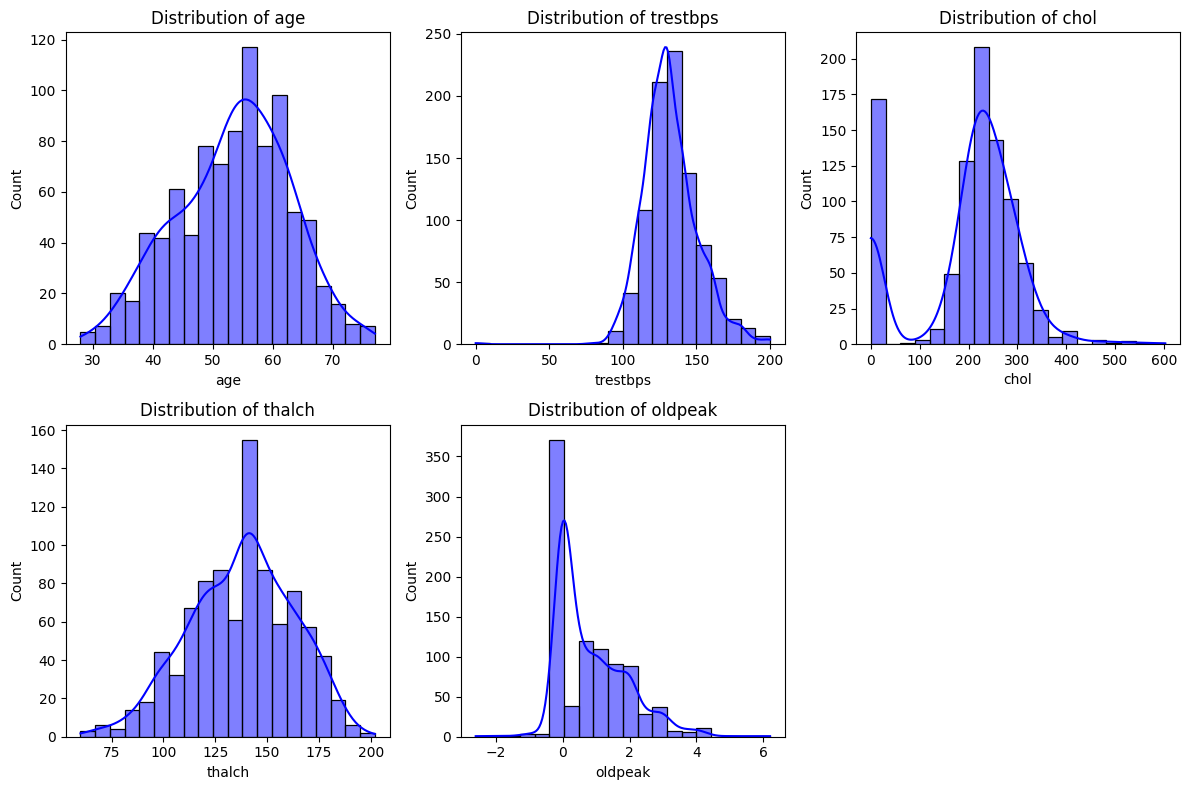

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of continuous variables
continuous_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

plt.figure(figsize=(12, 8))

for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


<ipython-input-22-a884caad365c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2')
<ipython-input-22-a884caad365c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2')
<ipython-input-22-a884caad365c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2')
<ipython-input-22-a884caad365c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

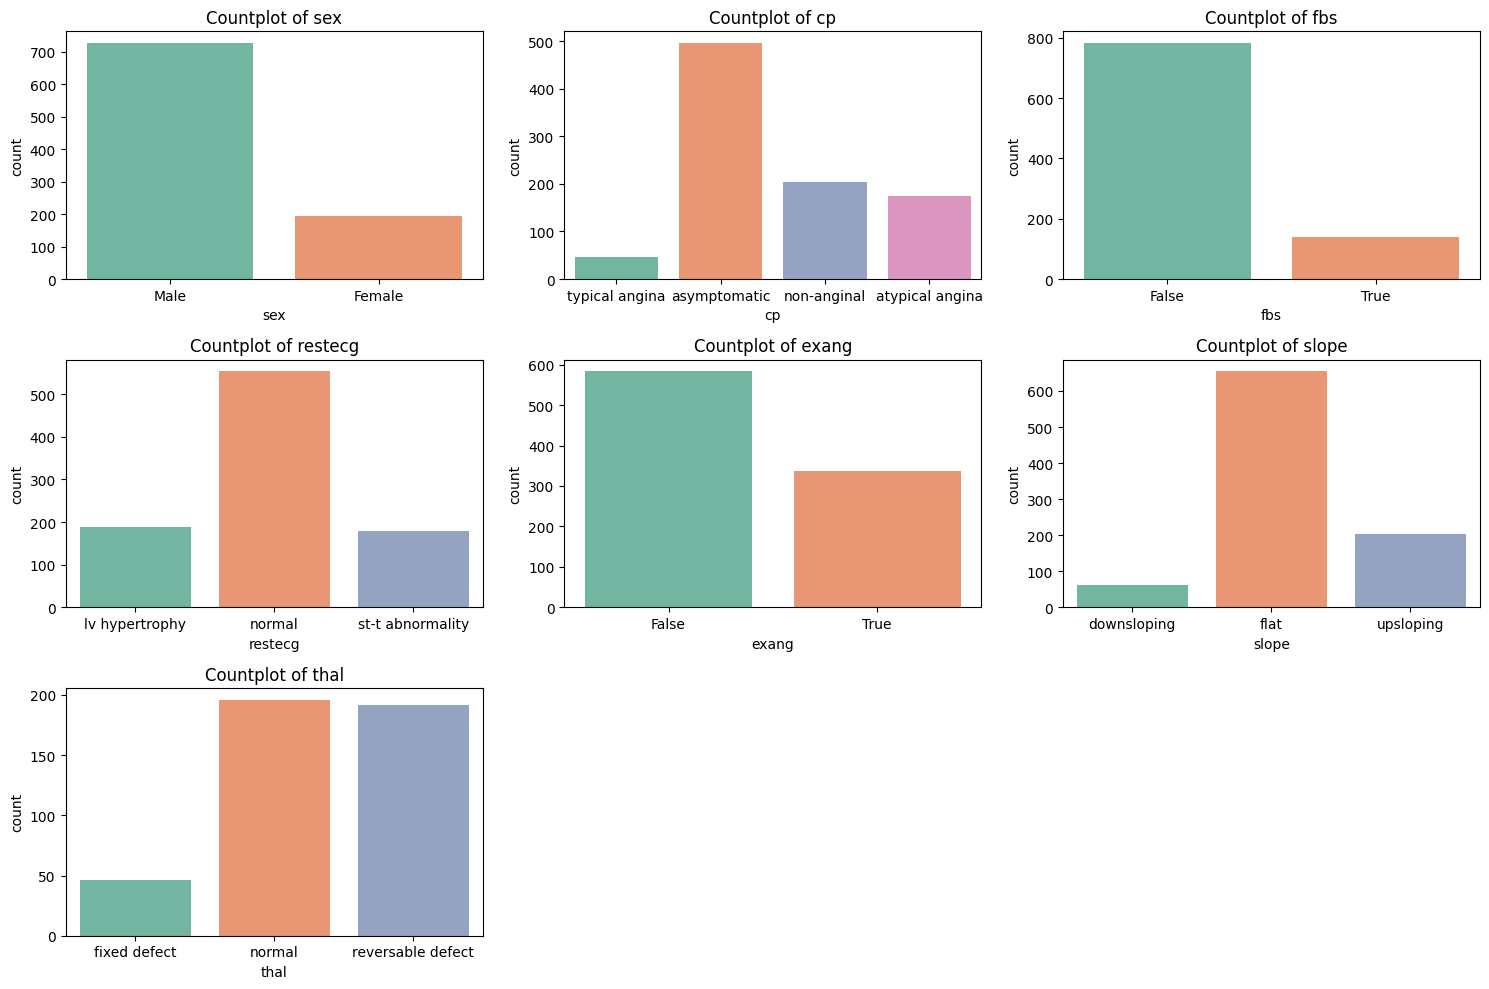

In [22]:
# Countplot for Categorical Variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[column], palette='Set2')
    plt.title(f'Countplot of {column}')

plt.tight_layout()
plt.show()


<ipython-input-23-757df6a940d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['num'], y=df[column], palette='Set1')
<ipython-input-23-757df6a940d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['num'], y=df[column], palette='Set1')
<ipython-input-23-757df6a940d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['num'], y=df[column], palette='Set1')
<ipython-input-23-757df6a940d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

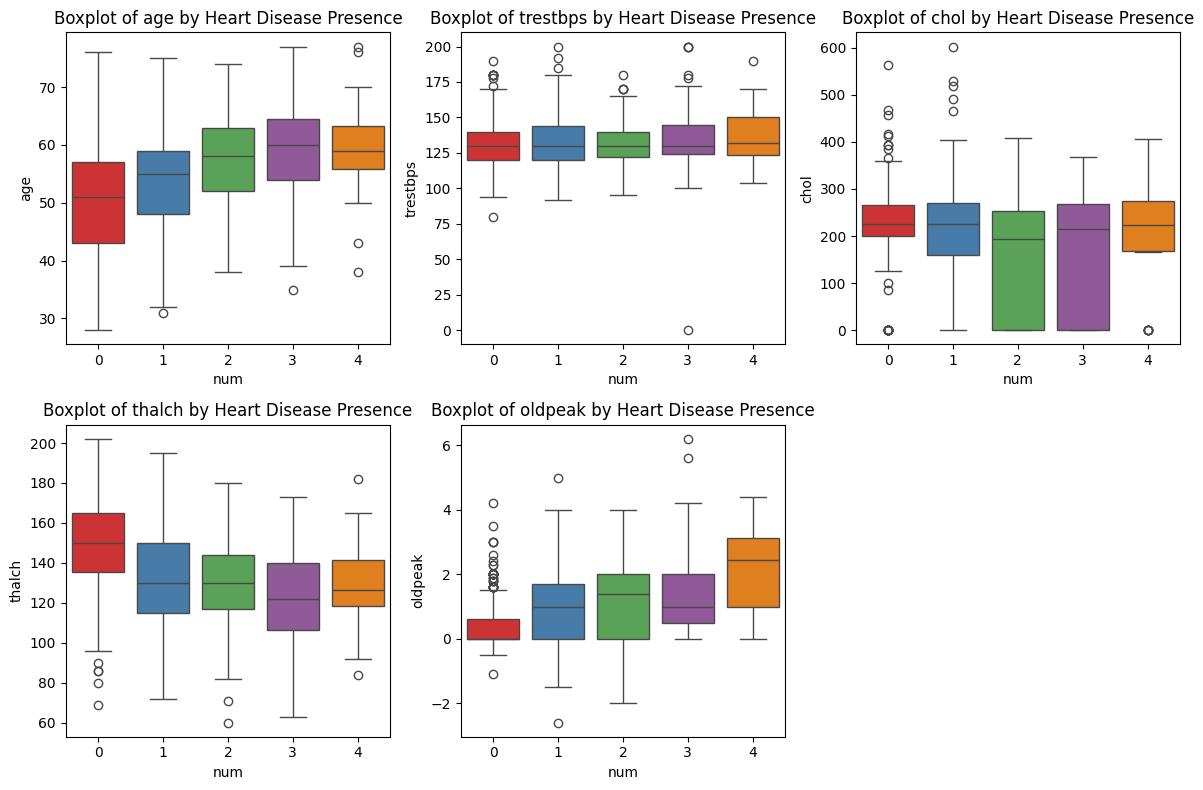

In [23]:
# Boxplot for continuous variables by 'num' (heart disease target)
plt.figure(figsize=(12, 8))

for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['num'], y=df[column], palette='Set1')
    plt.title(f'Boxplot of {column} by Heart Disease Presence')

plt.tight_layout()
plt.show()


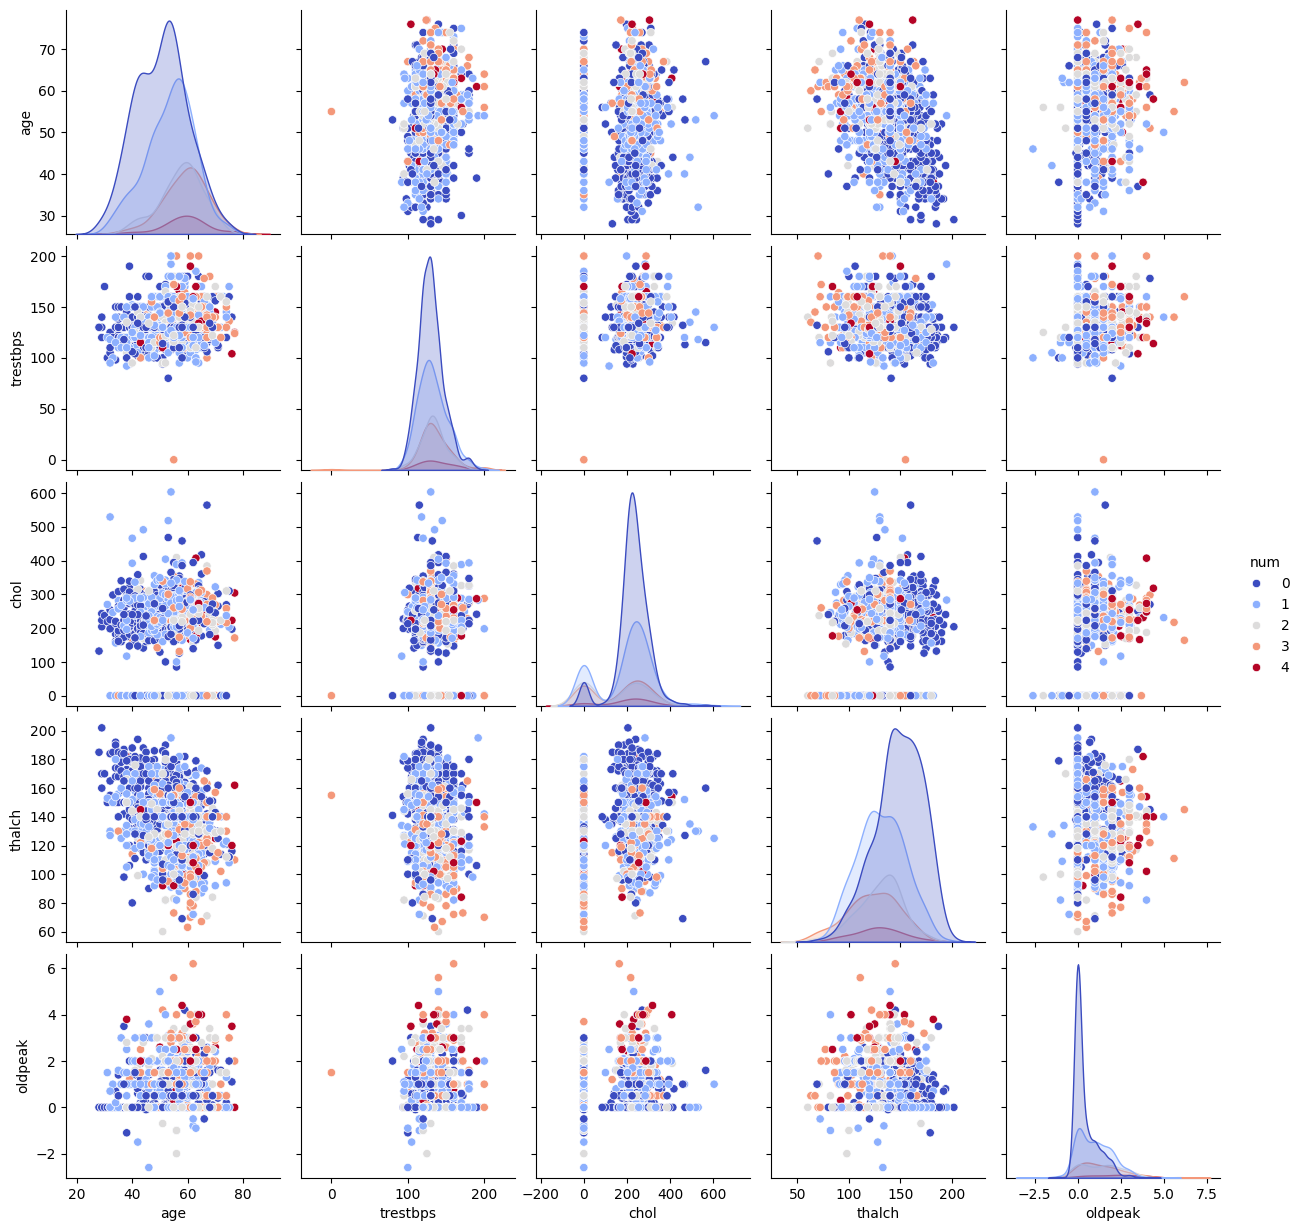

In [24]:
# Pairplot for continuous features
sns.pairplot(df[continuous_columns + ['num']], hue='num', diag_kind='kde', palette='coolwarm')
plt.show()


<ipython-input-25-bd95e453a0a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y=column, data=df, palette='muted')
<ipython-input-25-bd95e453a0a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y=column, data=df, palette='muted')
<ipython-input-25-bd95e453a0a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y=column, data=df, palette='muted')
<ipython-input-25-bd95e453a0a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

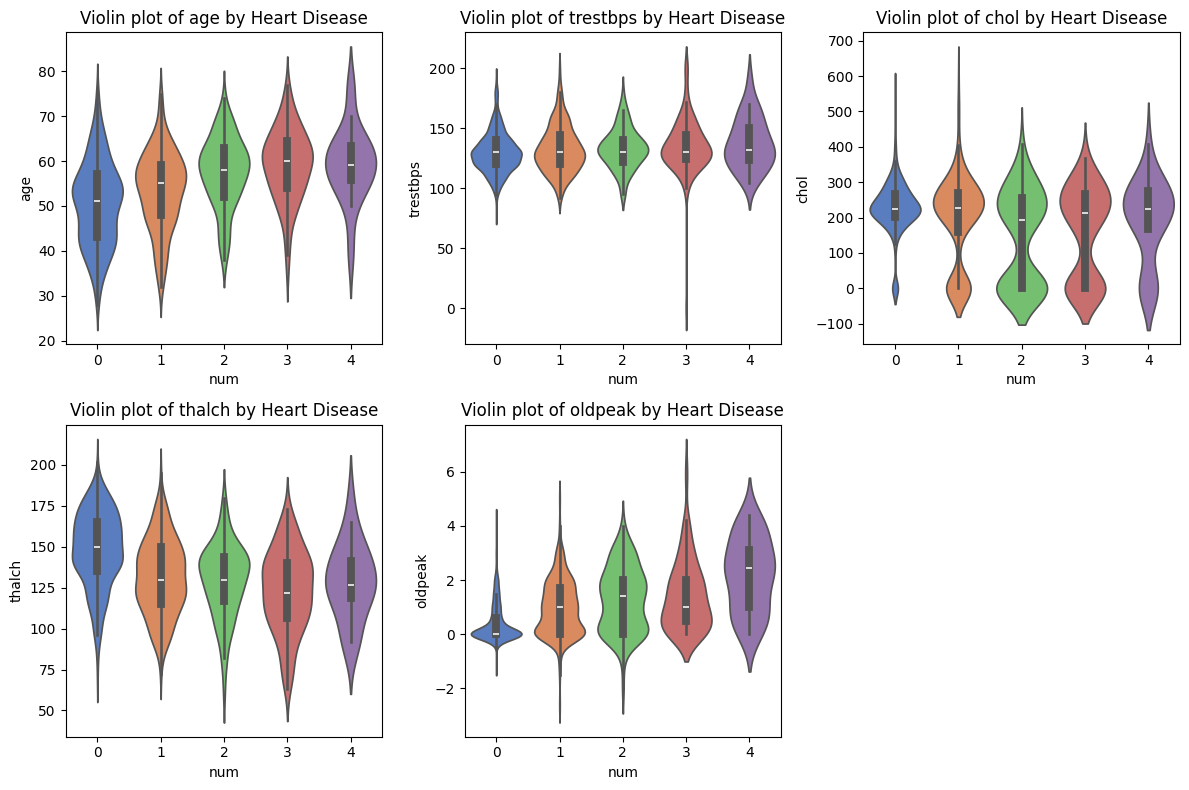

In [25]:
# Violin Plot for continuous variables by 'num'
plt.figure(figsize=(12, 8))

for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='num', y=column, data=df, palette='muted')
    plt.title(f'Violin plot of {column} by Heart Disease')

plt.tight_layout()
plt.show()


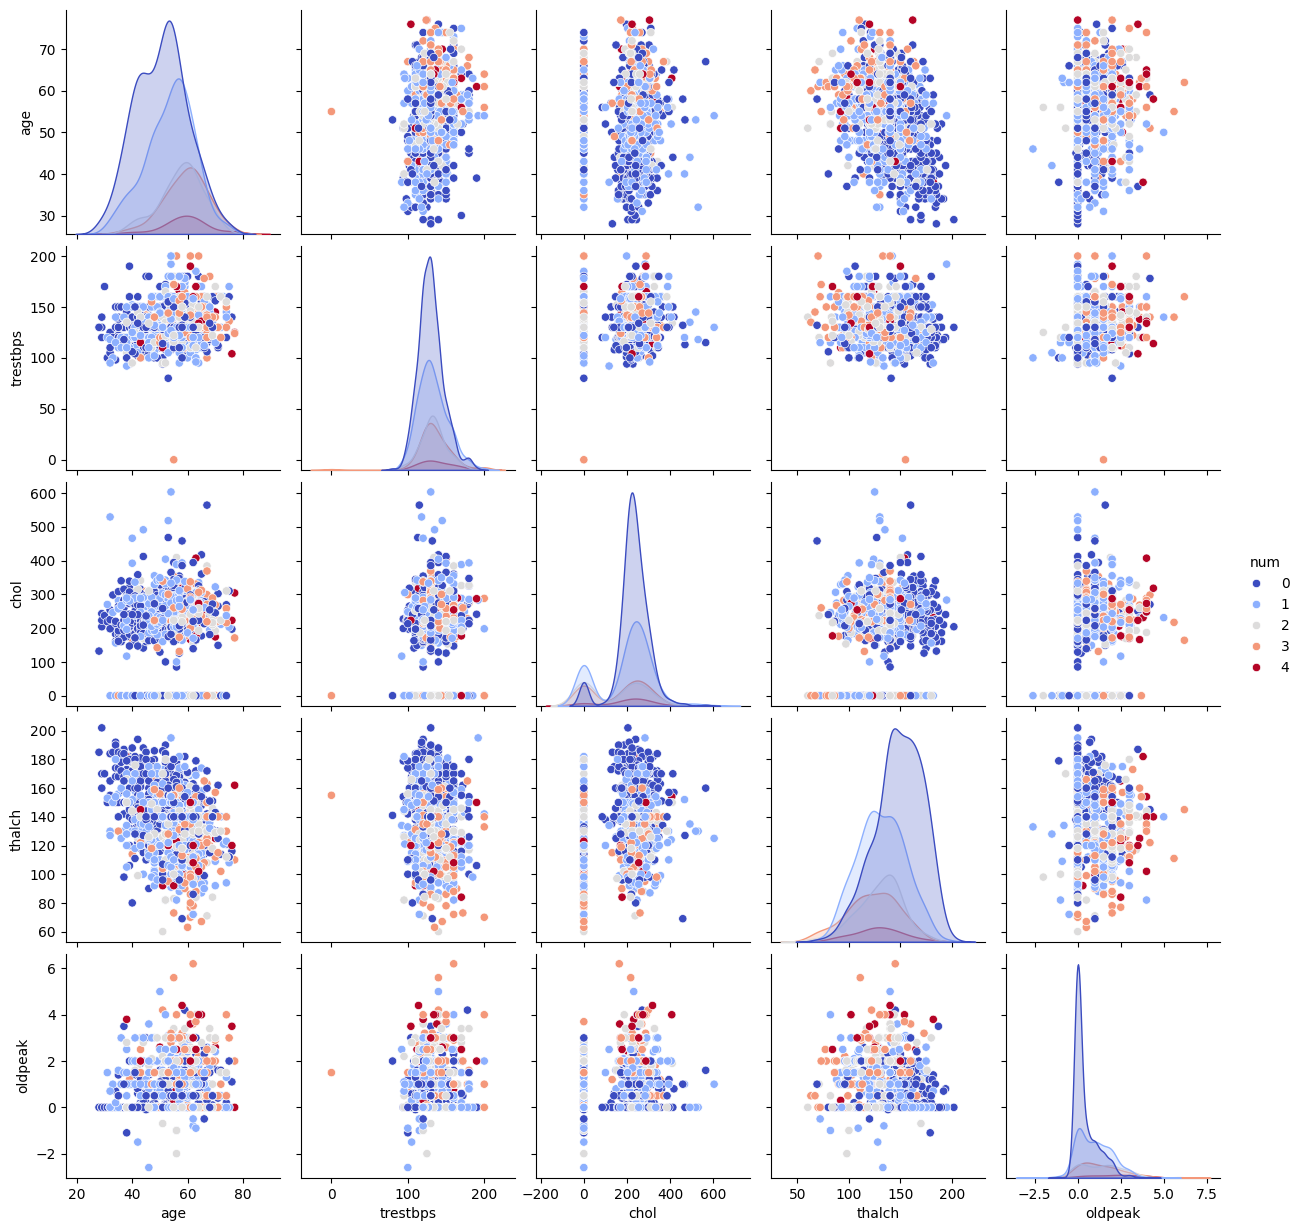

In [26]:
# Pairplot to compare heart disease vs no heart disease
sns.pairplot(df, hue='num', palette='coolwarm', vars=['age', 'trestbps', 'chol', 'thalch', 'oldpeak'])
plt.show()


# **Bivariate Analysis**

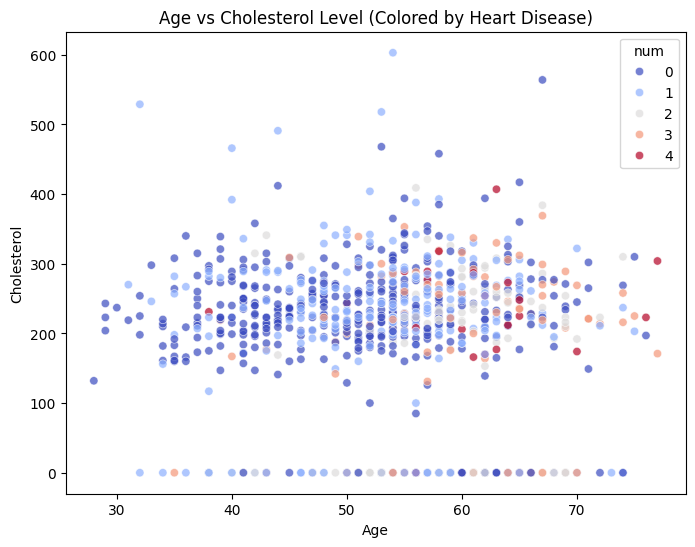

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for age vs cholesterol, colored by heart disease (target variable 'num')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='num', data=df, palette='coolwarm', alpha=0.7)
plt.title('Age vs Cholesterol Level (Colored by Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


<ipython-input-28-c92ecca97478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette='Set2')


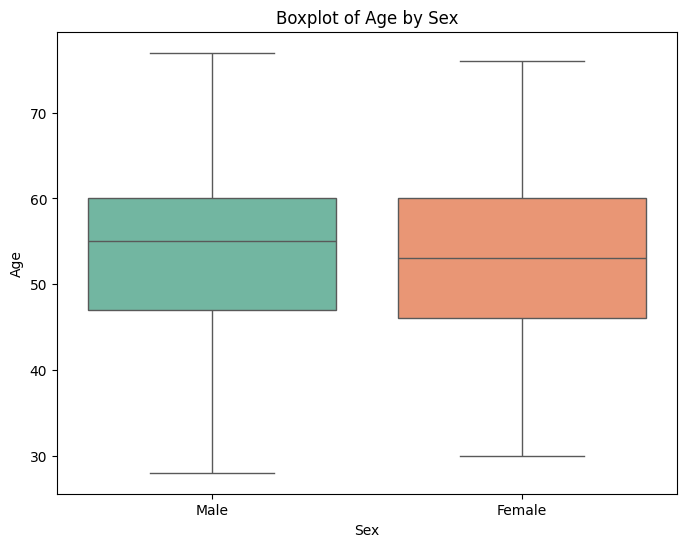

In [28]:
# Boxplot for age by sex (Male/Female)
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=df, palette='Set2')
plt.title('Boxplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()
